In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Didar\Downloads\bitirme\dava_sonuclari.csv")
print(df.head())

    Case Type  Case Duration (Days)  Judge Experience (Years)  \
0    Criminal                   221                        39   
1       Civil                   212                        14   
2       Civil                    47                         6   
3  Commercial                   358                        13   
4    Criminal                    33                        17   

   Number of Witnesses  Legal Fees (USD)  Plaintiff's Reputation  \
0                   18             24306                       2   
1                    1             42444                       3   
2                   19             21418                       1   
3                    9             45005                       3   
4                   17             36315                       2   

   Defendant's Wealth (USD)  Number of Evidence Items  \
0                    663160                         3   
1                    252011                        67   
2                    307309  

In [3]:
print("isna():\n", df.isna())
print("\nSum of na (per column):\n", df.isna().sum())

isna():
      Case Type  Case Duration (Days)  Judge Experience (Years)  \
0        False                 False                     False   
1        False                 False                     False   
2        False                 False                     False   
3        False                 False                     False   
4        False                 False                     False   
..         ...                   ...                       ...   
195      False                 False                     False   
196      False                 False                     False   
197      False                 False                     False   
198      False                 False                     False   
199      False                 False                     False   

     Number of Witnesses  Legal Fees (USD)  Plaintiff's Reputation  \
0                  False             False                   False   
1                  False             False                

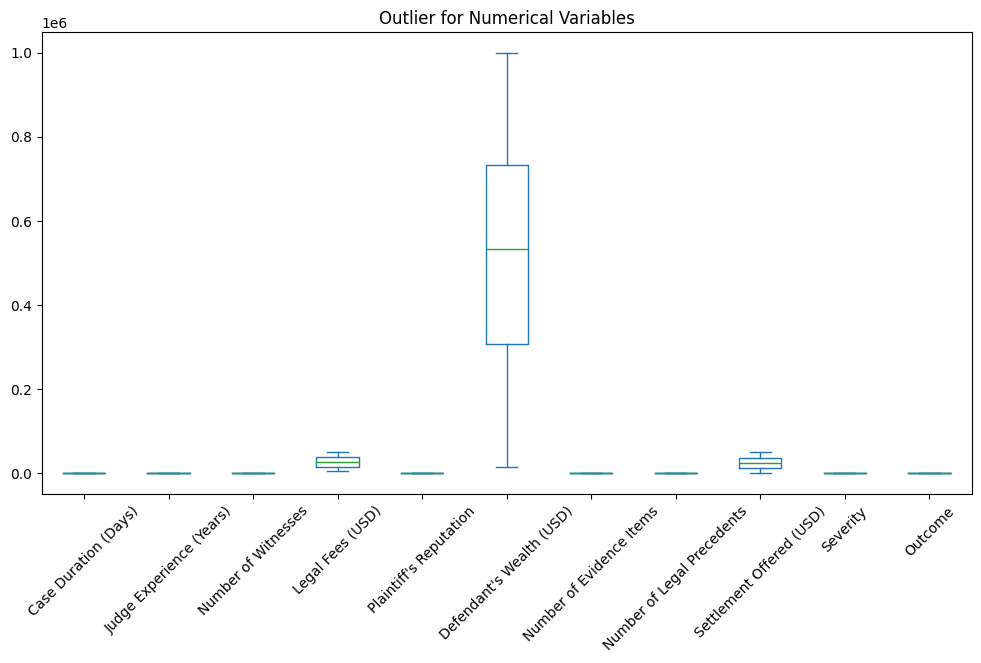

In [4]:
numeric_columns = df.select_dtypes(include = ["int64", "float64"]).columns

df[numeric_columns].plot(kind="box", figsize=(12,6))
plt.title("Outlier for Numerical Variables")
plt.xticks(rotation=45)
plt.show()

In [5]:
print(df["Defendant's Wealth (USD)"].max())
print(df["Defendant's Wealth (USD)"].min())

998828
15798


In [6]:
print(df["Defendant's Wealth (USD)"].describe())

count       200.000000
mean     526074.070000
std      266597.695079
min       15798.000000
25%      307007.000000
50%      532654.000000
75%      732185.750000
max      998828.000000
Name: Defendant's Wealth (USD), dtype: float64


In [7]:
print(df["Defendant's Wealth (USD)"].sort_values(ascending=False).head(10))

39     998828
47     996515
90     996022
156    994317
76     991313
169    987062
122    967871
83     967072
167    965127
116    962664
Name: Defendant's Wealth (USD), dtype: int64


In [8]:
lower_limit = df["Defendant's Wealth (USD)"].quantile(0.01)
upper_limit = df["Defendant's Wealth (USD)"].quantile(0.99)

print("Lower limit: ", lower_limit)
print("Upper limit: ", upper_limit)

print("Sum of columns that less than lower limit: ", df[df["Defendant's Wealth (USD)"] < lower_limit].shape[0])
print("Sum of columns that greater than upper limit: ", df[df["Defendant's Wealth (USD)"] > upper_limit].shape[0])

df = df[(df["Defendant's Wealth (USD)"] >= lower_limit) & (df["Defendant's Wealth (USD)"] <= upper_limit)]

print("New maximum value: ", df["Defendant's Wealth (USD)"].max())
print("New minimum value: ", df["Defendant's Wealth (USD)"].min())
print("Remaining row count: ", df.shape[0])

Lower limit:  42420.41
Upper limit:  996026.93
Sum of columns that less than lower limit:  2
Sum of columns that greater than upper limit:  2
New maximum value:  996022
New minimum value:  42534
Remaining row count:  196


In [ ]:
# After applying the outlier filtering based on the 1st and 99th percentiles of the "Defendant's Wealth (USD)" column, 4 rows were removed (2 below the lower limit and 2 above the upper limit). As a result, the remaining dataset consists of 196 rows, with a minimum value of 42,534 and a maximum value of 996,022.

In [20]:
from sklearn.model_selection import train_test_split

In [46]:
x = df.drop(columns = ["Outcome"])
y = df["Outcome"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Training set size: ", x_train.shape[0])
print("Test set size: ", x_test.shape[0])

Training set size:  156
Test set size:  40


In [ ]:
# The dataset was split into training and test sets, with 156 samples (80%) used for training and 40 samples (20%) used for testing.

In [44]:
print(df.dtypes)

Case Type                     int64
Case Duration (Days)          int64
Judge Experience (Years)      int64
Number of Witnesses           int64
Legal Fees (USD)              int64
Plaintiff's Reputation        int64
Defendant's Wealth (USD)      int64
Number of Evidence Items      int64
Number of Legal Precedents    int64
Settlement Offered (USD)      int64
Severity                      int64
Outcome                       int64
dtype: object


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
from sklearn.preprocessing import LabelEncoder

In [50]:
encoder = LabelEncoder()

df["Case Type"] = encoder.fit_transform(df["Case Type"])
df["Severity"] = encoder.fit_transform(df["Severity"])
df["Outcome"] = encoder.fit_transform(df["Outcome"])

In [56]:
x = df.drop(columns = ["Outcome"])
y = df["Outcome"]

model = DecisionTreeClassifier(random_state = 42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
clf = DecisionTreeClassifier(random_state = 42)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("First 10 predictions: ", y_pred[:10])

First 10 predictions:  [0 0 0 0 0 0 0 0 0 0]


In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

conf_matrix = confusion_matrix(y_test,y_pred, labels=[0,1])
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report:\n", classification_report(y_test, y_pred))

print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

Accuracy:  1.0
Confusion Matrix:
 [[40  0]
 [ 0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Outcome
0    196
Name: count, dtype: int64
Outcome
0    156
Name: count, dtype: int64
Outcome
0    40
Name: count, dtype: int64


In [ ]:
# The Outcome variable contains only the value 0. In other words, the dataset lacks class diversity, as all observations belong to the same class.
# As a result, the model predicts every observation as 0, regardless of the input features.
# The accuracy score is 1.0, but this value is misleading, since the model has not actually learned any decision rules—it is simply repeating the single existing class.
# The confusion matrix confirms this: all observations are classified as 0, while class 1 is completely absent.
# Similarly, the classification report only provides metrics for class 0, and values for class 1 cannot be computed because it does not exist in the dataset.
# These results show that the dataset suffers not from class imbalance, but from a complete lack of diversity in the target variable. Since there is only one class present, the evaluation metrics are not meaningful. For a realistic classification task, the target variable (Outcome) must contain at least two distinct classes.

In [72]:
from sklearn.tree import plot_tree

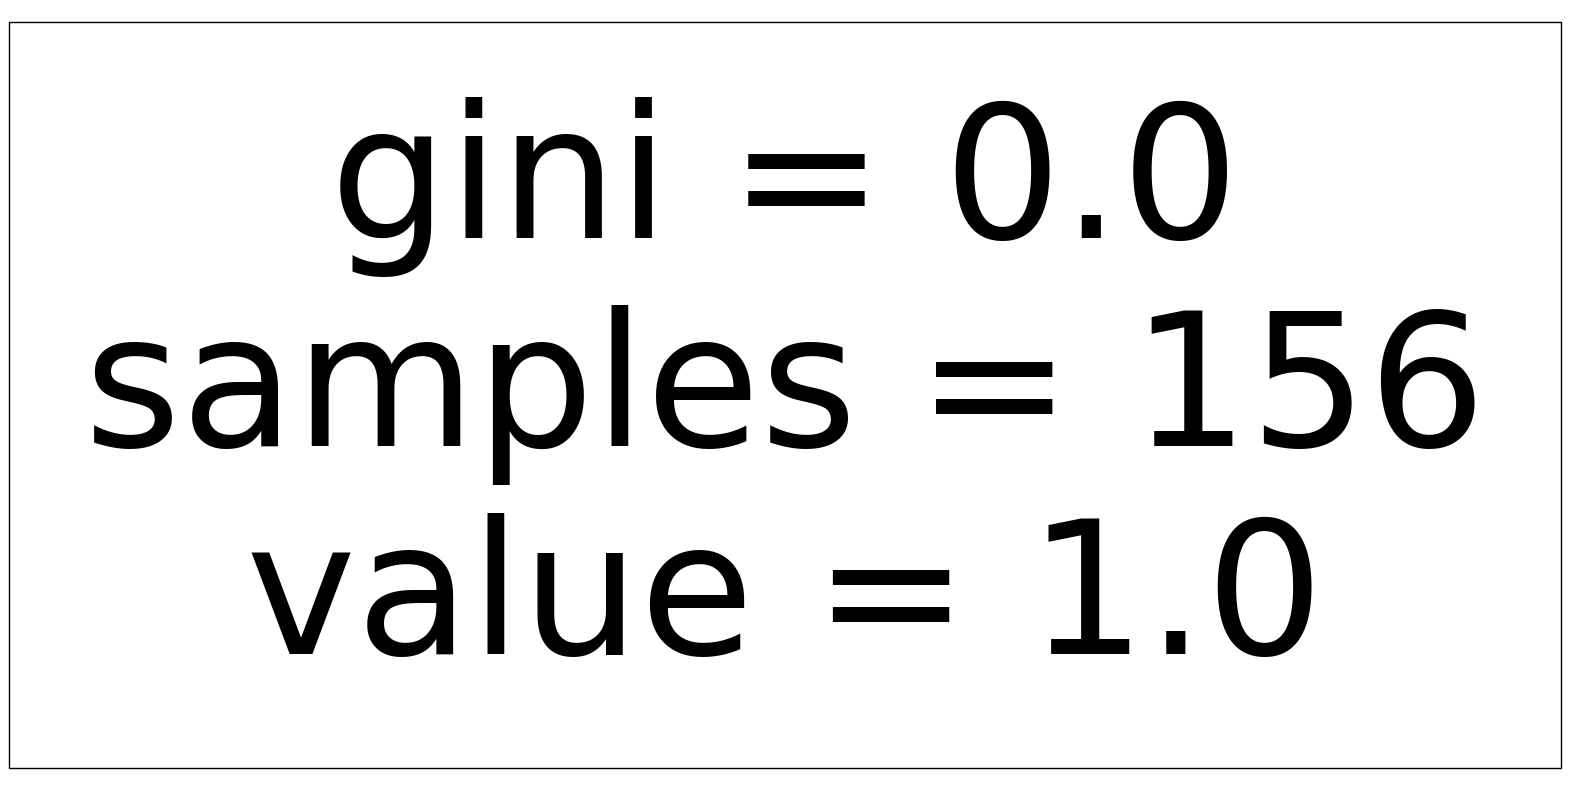

In [74]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns, class_names=[0], filled=True)
plt.show()

In [ ]:
# The decision tree visualization shows a single leaf node with gini = 0.0, samples = 156, and value = 1.0. This indicates that all training samples belong to the same class, resulting in a pure node without any splits. As a consequence, the decision tree cannot differentiate between features, and no variable contributes to the classification.

In [76]:
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                       Feature  Importance
0                    Case Type         0.0
1         Case Duration (Days)         0.0
2     Judge Experience (Years)         0.0
3          Number of Witnesses         0.0
4             Legal Fees (USD)         0.0
5       Plaintiff's Reputation         0.0
6     Defendant's Wealth (USD)         0.0
7     Number of Evidence Items         0.0
8   Number of Legal Precedents         0.0
9     Settlement Offered (USD)         0.0
10                    Severity         0.0


In [ ]:
# Since the target variable has only one class (0), the decision tree cannot effectively split the data. As a result, feature importances are either zero or distributed randomly. This means that no feature actually contributes to predicting the outcome, because there is no variation in the target variable.
# In a real classification problem with at least two classes, the decision tree would rank features according to their contribution to splitting the data. For example, variables like "Case Type", "Judge Experience (Years)", or "Defendant's Wealth (USD)" might have been important predictors. However, due to the structure of this dataset, all features appear equally irrelevant.